# Final project for discipline "Big Data ingestion /Storage"
## Theme: Fetal Health Classification

### IMPORTING LIBRARIES

In [243]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

from sklearn.decomposition import PCA

### LOADING DATA

In [244]:
df = pd.read_csv("fetal_health.csv") #read data

In [245]:
df.head(10) #look at the top 10 rows

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


### Understanding the data, Research

In [246]:
df.shape  #confirm the number of samples and features

(2126, 22)

In [247]:
# This dataset contains 2126 records of features extracted from Cardiotocogram exams

In [248]:
df.info() #data types of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [249]:
# Features (X)

# 'baseline value' FHR baseline (beats per minute)
# 'accelerations' Number of accelerations per second
# 'fetal_movement' Number of fetal movements per second
# 'uterine_contractions' Number of uterine contractions per second
# 'light_decelerations' Number of light decelerations per second
# 'severe_decelerations' Number of severe decelerations per second
# 'prolongued_decelerations' Number of prolonged decelerations per second
# 'abnormal_short_term_variability' Percentage of time with abnormal short term variability
# 'mean_value_of_short_term_variability' Mean value of short term variability
# 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
# 'mean_value_of_long_term_variability' Mean value of long term variability
# 'histogram_width' Width of FHR histogram
# 'histogram_min' Minimum (low frequency) of FHR histogram
# 'histogram_max' Maximum (high frequency) of FHR histogram
# 'histogram_number_of_peaks' Number of histogram peaks
# 'histogram_number_of_zeroes' Number of histogram zeros
# 'histogram_mode' Histogram mode
# 'histogram_mean' Histogram mean
# 'histogram_median' Histogram median
# 'histogram_variance' Histogram variance
# 'histogram_tendency' Histogram tendency

# Target (Y)

# 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [250]:
df['fetal_health'].unique()

array([2., 1., 3.])

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

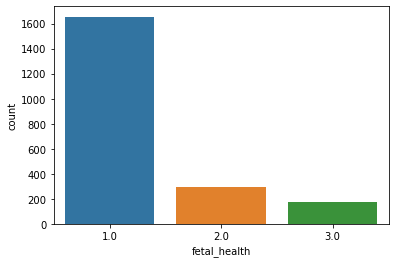

In [251]:
sns.countplot(data = df, x="fetal_health")

In [252]:
# Classified by expert obstetrician into 3 classes:

# 1 Normal
# 2 Suspect
# 3 Pathological

In [253]:
# check for the Null values

df.isnull().sum()

# Here in this dataset there is not null values.

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [254]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [255]:
#correlation
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


<AxesSubplot:>

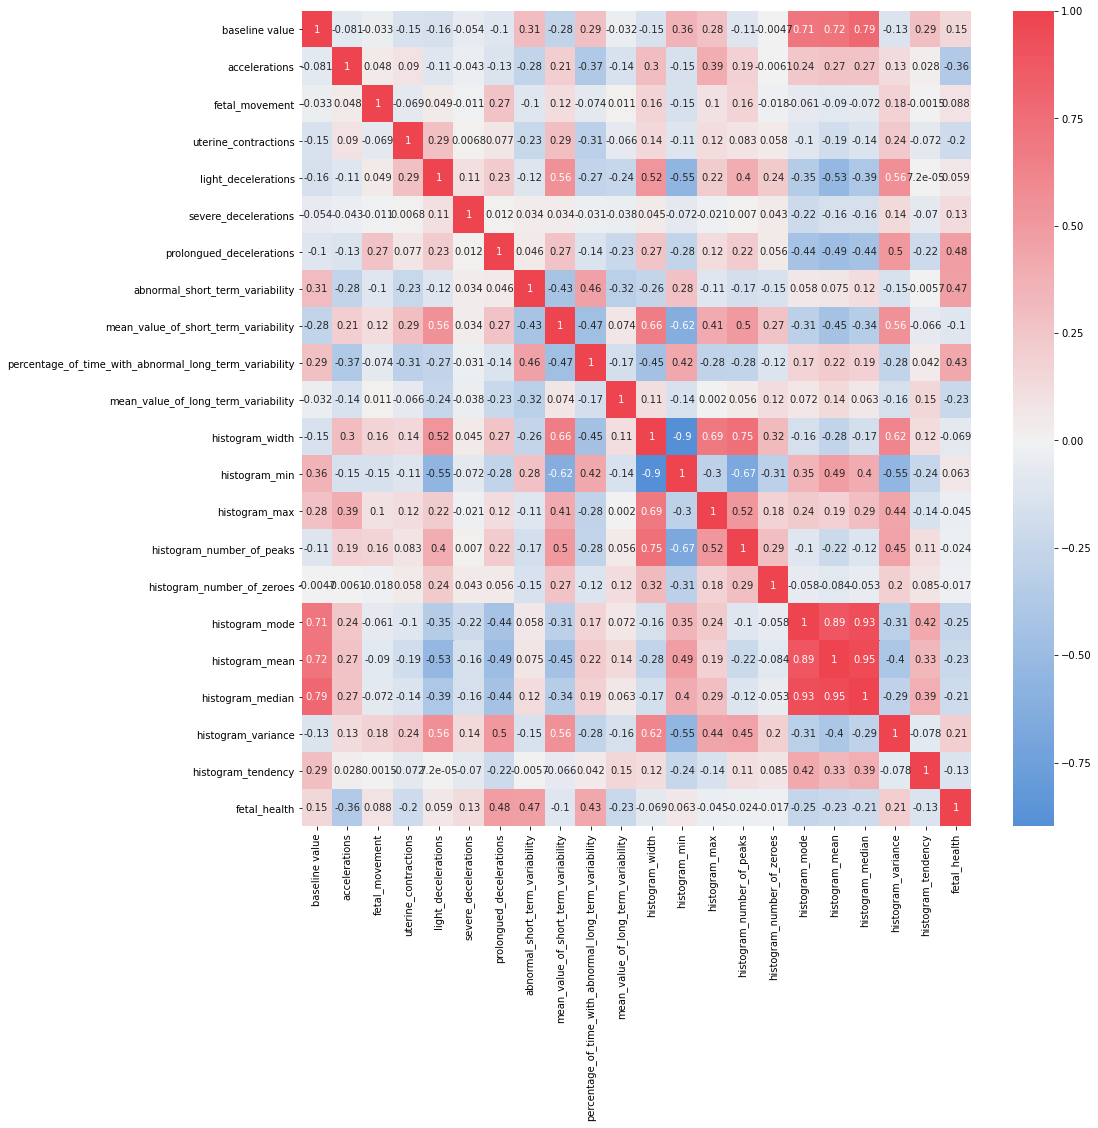

In [256]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [257]:
# Based on the correlation matix, it is clear that "accelerations","prolongued_decelerations", 
# "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and 
# "mean_value_of_long_term_variability" are the features with higher correlation with fetal_health. 


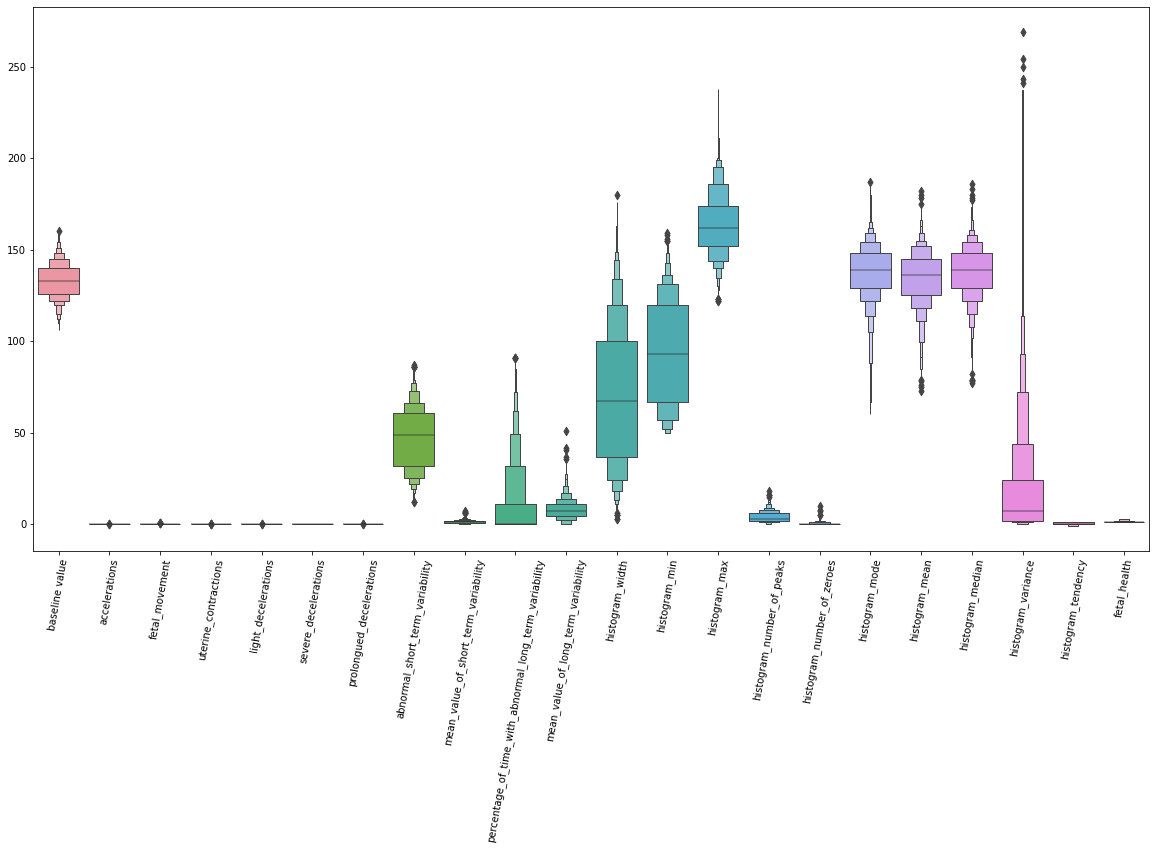

In [258]:
plt.figure(figsize=(20, 10))
sns.boxenplot(data = df)
plt.xticks(rotation = 80)
plt.show()

In [259]:
# The boxplot shows us the range of our feature attributes. As you can see, the features are in different ranges.
# To fit this in a model we should scale it to the same range.

## Create X and Y data (split to Features and Target values)

In [260]:
X = df.iloc[:, :-1] # x values
Y = df.iloc[:, -1] #y values

In [261]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [262]:
Y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

## Splitting the dataset into the Training set and Test set

#### **Perform 80/20 Data split**

In [263]:
# split the data to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [264]:
print(X_train)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
612            143.0          0.005           0.013                 0.003   
1540           136.0          0.006           0.000                 0.006   
1325           128.0          0.004           0.010                 0.005   
834            128.0          0.007           0.000                 0.003   
133            159.0          0.001           0.000                 0.008   
...              ...            ...             ...                   ...   
960            133.0          0.000           0.000                 0.006   
905            146.0          0.000           0.000                 0.007   
1096           123.0          0.017           0.000                 0.002   
235            121.0          0.003           0.006                 0.000   
1061           127.0          0.004           0.000                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [265]:
print(X_test)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
669            141.0          0.001           0.000                 0.001   
1205           143.0          0.000           0.000                 0.006   
870            136.0          0.008           0.000                 0.007   
547            138.0          0.000           0.029                 0.005   
1806           143.0          0.000           0.000                 0.001   
...              ...            ...             ...                   ...   
1292           115.0          0.004           0.000                 0.010   
1661           106.0          0.000           0.000                 0.010   
636            143.0          0.000           0.002                 0.000   
439            151.0          0.000           0.000                 0.006   
330            146.0          0.000           0.004                 0.000   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [266]:
print(Y_train)

612     1.0
1540    1.0
1325    1.0
834     1.0
133     1.0
       ... 
960     1.0
905     1.0
1096    1.0
235     1.0
1061    1.0
Name: fetal_health, Length: 1700, dtype: float64


In [267]:
print(Y_test)

669     1.0
1205    2.0
870     1.0
547     2.0
1806    1.0
       ... 
1292    1.0
1661    1.0
636     1.0
439     2.0
330     2.0
Name: fetal_health, Length: 426, dtype: float64


## Feature Scaling StandardScaler

In [268]:
#Set up a standard scaler for the features
col_names = list(X.columns)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=col_names)   
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,1700.0,-6.492192e-16,1.000294,-2.826830,-0.655293,-0.034854,0.688992,2.757122
accelerations,1700.0,-9.425467e-17,1.000294,-0.820076,-0.820076,-0.298614,0.744310,4.133813
fetal_movement,1700.0,1.400514e-16,1.000294,-0.205566,-0.205566,-0.205566,-0.141252,10.106171
uterine_contractions,1700.0,-7.379718e-17,1.000294,-1.485623,-0.807347,0.210066,0.888341,3.601443
light_decelerations,1700.0,-1.336186e-16,1.000294,-0.651087,-0.651087,-0.651087,0.346373,4.336211
severe_decelerations,1700.0,-1.606640e-16,1.000294,-0.059514,-0.059514,-0.059514,-0.059514,16.802778
prolongued_decelerations,1700.0,-1.834480e-16,1.000294,-0.277203,-0.277203,-0.277203,-0.277203,7.932652
abnormal_short_term_variability,1700.0,-1.441331e-16,1.000294,-2.035200,-0.868995,0.063970,0.822003,2.338071
mean_value_of_short_term_variability,1700.0,-2.546982e-17,1.000294,-1.290177,-0.725650,-0.161123,0.403405,6.274489
percentage_of_time_with_abnormal_long_term_variability,1700.0,-1.567374e-16,1.000294,-0.534616,-0.534616,-0.534616,0.074086,4.501008


In [269]:
X_test = pd.DataFrame(X_test, columns=col_names)   
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,426.0,-0.017134,1.085076,-2.826830,-0.862106,-0.034854,0.792398,2.653716
accelerations,426.0,0.042907,1.038089,-0.820076,-0.820076,-0.298614,0.744310,3.873082
fetal_movement,426.0,-0.011566,1.002085,-0.205566,-0.205566,-0.205566,-0.162690,9.870352
uterine_contractions,426.0,-0.023987,0.995376,-1.485623,-0.807347,-0.129072,0.549204,2.584030
light_decelerations,426.0,-0.114113,0.912744,-0.651087,-0.651087,-0.651087,0.013886,4.336211
severe_decelerations,426.0,-0.019931,0.816981,-0.059514,-0.059514,-0.059514,-0.059514,16.802778
prolongued_decelerations,426.0,-0.084484,0.828223,-0.277203,-0.277203,-0.277203,-0.277203,6.290681
abnormal_short_term_variability,426.0,0.025370,1.012271,-2.035200,-0.868995,0.180590,0.865736,2.163140
mean_value_of_short_term_variability,426.0,-0.055903,0.984790,-1.290177,-0.725650,-0.161123,0.403405,6.387395
percentage_of_time_with_abnormal_long_term_variability,426.0,0.051224,1.086147,-0.534616,-0.534616,-0.534616,0.074086,4.501008


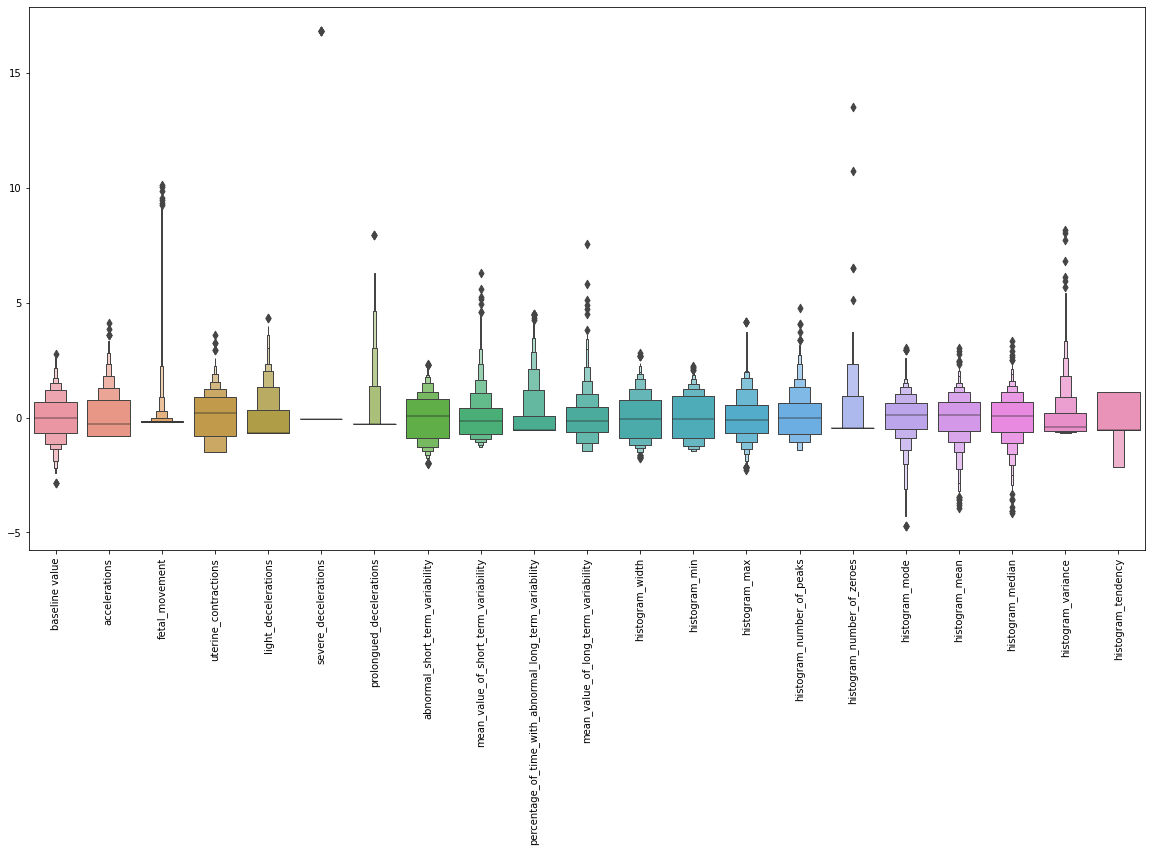

In [270]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_train)
plt.xticks(rotation=90)
plt.show()

## PCA

In [271]:
X_train.shape[1]

21

In [284]:
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [285]:
scores_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
scores_df

,PC1,PC2,PC3,PC4,PC5
0,0.692180,3.138697,0.131413,0.170401,0.624473
1,-1.749088,-0.033905,-0.548404,-1.277650,-0.741757
2,2.472588,0.341842,-0.255301,0.423640,0.239265
3,1.618844,2.360805,-0.437812,0.298070,-0.436108
4,-3.586546,2.342534,1.146141,-0.198246,-1.072158
...,...,...,...,...,...
1695,2.797292,1.011794,-1.118603,1.562484,-0.901459
1696,-0.904192,0.744327,-0.054409,0.196952,-1.355330
1697,-0.023476,-0.020879,-1.786928,-2.625931,0.666111
1698,-0.150390,-1.309474,-1.122646,1.506163,1.170161


In [287]:
explained_variance = pca.explained_variance_ratio_

In [288]:
pc_df = pd.DataFrame(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df], axis=1)
df_explained_variance



,PC,Explained Variance
0,PC1,0.288509
1,PC2,0.168940
2,PC3,0.086849
3,PC4,0.070104
4,PC5,0.057784


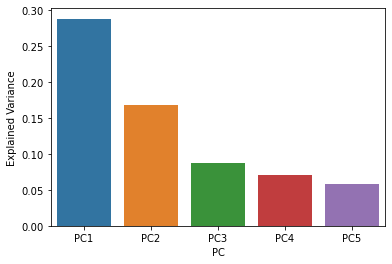

In [289]:
ax = sns.barplot(data= df_explained_variance, x='PC', y='Explained Variance')


## Build Classification Model using Random Forest

In [290]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
model = RandomForestClassifier()

In [291]:
model.fit(X_train_pca, Y_train)

RandomForestClassifier()

### Predicting the Test set results

In [292]:
y_pred = model.predict(X_test_pca) #predict test values

In [293]:
y_pred

array([1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       1., 1., 3., 3., 1., 1., 1., 2., 3., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 3., 1., 1.,
       1., 3., 1., 3., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 3., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 2., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 1.

## Acccuracy

In [294]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       326
         2.0       0.73      0.53      0.62        68
         3.0       0.83      0.75      0.79        32

    accuracy                           0.89       426
   macro avg       0.83      0.75      0.78       426
weighted avg       0.88      0.89      0.88       426



<AxesSubplot:>

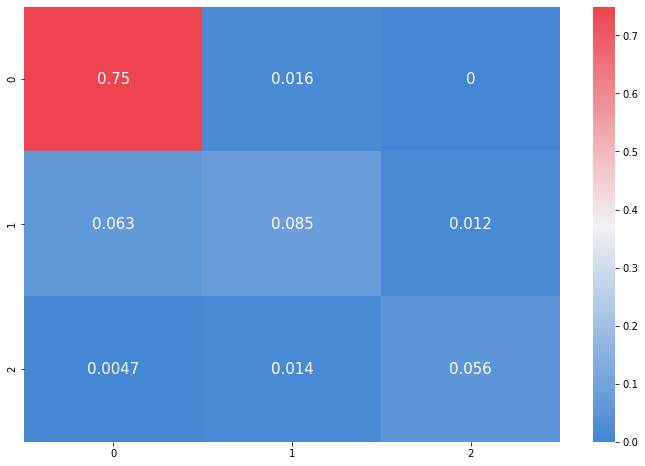

In [295]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

In [296]:
accuracy= accuracy_score(Y_test, y_pred)
accuracy * 100

88.96713615023474